## Assignment 2 : pandas + Regular Expressions
#### Name : Amit Gido
#### ID : 315754606

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
PATH = "C:\\Users\\dell\\Desktop\\לימודים\\שנה ג\\סמסטר ב\\כרייה וניתוח נתונים מתקדם\\Datasets and Resources\\"


In [3]:
data = open(PATH + 'matala2_cosmetics_2019-Nov.csv')
df = pd.read_csv(data)


<ipython-input-3-98d79edf13d9>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


In [4]:
df.drop(columns=['brand','category_code','category_id'], inplace=True)
df


,event_time,event_type,product_id,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [5]:
df = df[0:150000]

In [6]:
df


,event_time,event_type,product_id,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...
149995,2019-11-02 10:17:36 UTC,cart,5837082,4.76,468227009,4e6f498a-bc0f-415b-bda7-521a555e78e9
149996,2019-11-02 10:17:37 UTC,view,5897551,2.54,550388516,78ea549b-8947-4996-be28-cbb982cab8e5
149997,2019-11-02 10:17:37 UTC,cart,5809921,2.06,554977978,56657573-b459-43e7-8914-253654af55de
149998,2019-11-02 10:17:38 UTC,cart,5895776,1.21,470167482,1368850c-e0d5-43e9-8f08-233319847859


##### Convert column event_time to Datetime :

In [7]:
df['datetime'] = pd.to_datetime(df['event_time'])


<ipython-input-7-670777f164f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['event_time'])


##### Convert the user_session column to a numeric category with one column :

In [8]:
df['user_session'] = df['user_session'].fillna(df['user_id'])


<ipython-input-8-295516b477b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_session'] = df['user_session'].fillna(df['user_id'])


In [9]:
df['user_session_numeric'] = df['user_session'].astype('category').cat.codes


<ipython-input-9-347943894d4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_session_numeric'] = df['user_session'].astype('category').cat.codes


In [10]:
df


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric
0,2019-11-01 00:00:02 UTC,view,5802432,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2019-11-01 00:00:02+00:00,1235
1,2019-11-01 00:00:09 UTC,cart,5844397,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:09+00:00,4138
2,2019-11-01 00:00:10 UTC,view,5837166,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,2019-11-01 00:00:10+00:00,11154
3,2019-11-01 00:00:11 UTC,cart,5876812,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,2019-11-01 00:00:11+00:00,3098
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:24+00:00,4138
...,...,...,...,...,...,...,...,...
149995,2019-11-02 10:17:36 UTC,cart,5837082,4.76,468227009,4e6f498a-bc0f-415b-bda7-521a555e78e9,2019-11-02 10:17:36+00:00,9968
149996,2019-11-02 10:17:37 UTC,view,5897551,2.54,550388516,78ea549b-8947-4996-be28-cbb982cab8e5,2019-11-02 10:17:37+00:00,15270
149997,2019-11-02 10:17:37 UTC,cart,5809921,2.06,554977978,56657573-b459-43e7-8914-253654af55de,2019-11-02 10:17:37+00:00,10959
149998,2019-11-02 10:17:38 UTC,cart,5895776,1.21,470167482,1368850c-e0d5-43e9-8f08-233319847859,2019-11-02 10:17:38+00:00,2458


##### Sort the dataframe by user ID and then by dates for each user ID :

In [11]:
df_sorted = df.sort_values(['user_session_numeric', 'datetime'], ascending=[True, True])


In [12]:
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0
24018,2019-11-01 08:13:29 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:29+00:00,0
24024,2019-11-01 08:13:31 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:31+00:00,0
24029,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0
24030,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0
...,...,...,...,...,...,...,...,...
132302,2019-11-02 06:49:03 UTC,view,5797971,1.73,445854537,fffdc1ba-40b0-4658-b778-a0f89e8e6514,2019-11-02 06:49:03+00:00,32243
118938,2019-11-01 23:54:15 UTC,remove_from_cart,5760789,2.62,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:15+00:00,32244
118943,2019-11-01 23:54:34 UTC,remove_from_cart,5814830,2.38,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:34+00:00,32244
118948,2019-11-01 23:54:57 UTC,remove_from_cart,5789668,2.68,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:57+00:00,32244


### Question 1 :

##### Group the dataframe by user_id, and calculate the time difference between consecutive events for each group :

In [13]:
df_sorted['duration_to_next_event'] = df_sorted.groupby('user_session_numeric')['datetime'].apply(lambda x: x.diff().dt.total_seconds())


<ipython-input-13-9611d774725b>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_sorted['duration_to_next_event'] = df_sorted.groupby('user_session_numeric')['datetime'].apply(lambda x: x.diff().dt.total_seconds())


##### For the last event in each group, set the duration_to_next_event to 0 :

In [14]:
df_sorted.loc[df_sorted.groupby('user_session_numeric')['datetime'].tail(1).index, 'duration_to_next_event'] = 0


##### Replace all NaN values in the column 'my_column' with 0, beacause they the one and only, the last :

In [15]:
df_sorted['duration_to_next_event'] = df_sorted['duration_to_next_event'].shift(-1)


In [16]:
#df_sorted['duration_to_next_event'] = df_sorted['duration_to_next_event'].fillna(0)


In [17]:
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0,1.0
24018,2019-11-01 08:13:29 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:29+00:00,0,2.0
24024,2019-11-01 08:13:31 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:31+00:00,0,8.0
24029,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0
24030,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0
...,...,...,...,...,...,...,...,...,...
132302,2019-11-02 06:49:03 UTC,view,5797971,1.73,445854537,fffdc1ba-40b0-4658-b778-a0f89e8e6514,2019-11-02 06:49:03+00:00,32243,NaN
118938,2019-11-01 23:54:15 UTC,remove_from_cart,5760789,2.62,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:15+00:00,32244,19.0
118943,2019-11-01 23:54:34 UTC,remove_from_cart,5814830,2.38,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:34+00:00,32244,23.0
118948,2019-11-01 23:54:57 UTC,remove_from_cart,5789668,2.68,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:57+00:00,32244,0.0


### Question 2 :

In [18]:
df['event_date'] = df['event_time'].apply(lambda x: datetime.strptime(x.split(' ')[0], '%Y-%m-%d'))
df_2 = df.copy()

df_2 = df_2[['user_id','event_date', 'user_session']].drop_duplicates().sort_values(['user_id','event_date'])

df_2['diff'] = (df_2.groupby('user_id')['event_date'].diff() / np.timedelta64(1, 'D')).fillna(0.0)

df_2['diff5plus'] = df_2['diff'].apply(lambda x: 0 if x <= 5 else 1)

df_2['funnel_number'] = df_2.groupby('user_id')['diff5plus'].cumsum() + 1 #  +1 change funnel number range from [0:x-1] to [1:x]
df_2 = df_2[['user_id', 'event_date', 'user_session', 'funnel_number']]
df_2 = pd.merge(df, df_2, on=['user_id', 'event_date', 'user_session'], how='left')


<ipython-input-18-66f971505e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_date'] = df['event_time'].apply(lambda x: datetime.strptime(x.split(' ')[0], '%Y-%m-%d'))


In [19]:
df_2


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,event_date,funnel_number
0,2019-11-01 00:00:02 UTC,view,5802432,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2019-11-01 00:00:02+00:00,1235,2019-11-01,1
1,2019-11-01 00:00:09 UTC,cart,5844397,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:09+00:00,4138,2019-11-01,1
2,2019-11-01 00:00:10 UTC,view,5837166,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,2019-11-01 00:00:10+00:00,11154,2019-11-01,1
3,2019-11-01 00:00:11 UTC,cart,5876812,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,2019-11-01 00:00:11+00:00,3098,2019-11-01,1
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:24+00:00,4138,2019-11-01,1
...,...,...,...,...,...,...,...,...,...,...
149995,2019-11-02 10:17:36 UTC,cart,5837082,4.76,468227009,4e6f498a-bc0f-415b-bda7-521a555e78e9,2019-11-02 10:17:36+00:00,9968,2019-11-02,1
149996,2019-11-02 10:17:37 UTC,view,5897551,2.54,550388516,78ea549b-8947-4996-be28-cbb982cab8e5,2019-11-02 10:17:37+00:00,15270,2019-11-02,1
149997,2019-11-02 10:17:37 UTC,cart,5809921,2.06,554977978,56657573-b459-43e7-8914-253654af55de,2019-11-02 10:17:37+00:00,10959,2019-11-02,1
149998,2019-11-02 10:17:38 UTC,cart,5895776,1.21,470167482,1368850c-e0d5-43e9-8f08-233319847859,2019-11-02 10:17:38+00:00,2458,2019-11-02,1


### Question 3 :

##### Calculate the time difference between visits for each user :

In [20]:
df_sorted['time_diff'] = df_sorted.groupby('user_id')['datetime'].diff()


##### Assign a panel number to each group of visits that are not more than 5 days apart :

In [21]:
df_sorted['panel'] = (df_sorted['time_diff'] > pd.Timedelta(days=5)).cumsum()


##### Assign a funnel number to each row within each panel :

In [22]:
df_sorted['funnel_number'] = df_sorted.groupby(['user_id', 'panel']).cumcount() 


##### Drop the intermediate columns :


In [23]:
df_sorted = df_sorted.drop(['time_diff', 'panel'], axis=1)


In [24]:
df_sorted['index_in_funnel'] = [1]*df_sorted.shape[0]
df_sorted['index_in_funnel'] = df_sorted.groupby(['user_id', 'funnel_number'])['index_in_funnel'].cumsum()
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0,1.0,0,1
24018,2019-11-01 08:13:29 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:29+00:00,0,2.0,1,1
24024,2019-11-01 08:13:31 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:31+00:00,0,8.0,2,1
24029,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0,3,1
24030,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
132302,2019-11-02 06:49:03 UTC,view,5797971,1.73,445854537,fffdc1ba-40b0-4658-b778-a0f89e8e6514,2019-11-02 06:49:03+00:00,32243,NaN,51,1
118938,2019-11-01 23:54:15 UTC,remove_from_cart,5760789,2.62,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:15+00:00,32244,19.0,0,1
118943,2019-11-01 23:54:34 UTC,remove_from_cart,5814830,2.38,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:34+00:00,32244,23.0,1,1
118948,2019-11-01 23:54:57 UTC,remove_from_cart,5789668,2.68,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:57+00:00,32244,0.0,2,1


In [25]:
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0,1.0,0,1
24018,2019-11-01 08:13:29 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:29+00:00,0,2.0,1,1
24024,2019-11-01 08:13:31 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:31+00:00,0,8.0,2,1
24029,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0,3,1
24030,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
132302,2019-11-02 06:49:03 UTC,view,5797971,1.73,445854537,fffdc1ba-40b0-4658-b778-a0f89e8e6514,2019-11-02 06:49:03+00:00,32243,NaN,51,1
118938,2019-11-01 23:54:15 UTC,remove_from_cart,5760789,2.62,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:15+00:00,32244,19.0,0,1
118943,2019-11-01 23:54:34 UTC,remove_from_cart,5814830,2.38,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:34+00:00,32244,23.0,1,1
118948,2019-11-01 23:54:57 UTC,remove_from_cart,5789668,2.68,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:57+00:00,32244,0.0,2,1


### Question 4 :

In [26]:
df_sorted['price'] = df_sorted['price'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)


In [27]:
df_sorted['price'].dtypes


dtype('float64')

### Question 5:

##### Count the number of events of each type :

In [28]:
event_type_counts = df_sorted['event_type'].value_counts()


In [29]:
event_type_counts


view                66504
cart                42826
remove_from_cart    30706
purchase             9964
Name: event_type, dtype: int64

##### Create a bar chart :

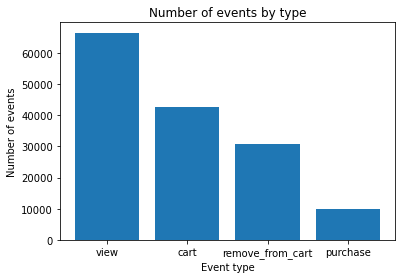

In [30]:
plt.bar(event_type_counts.index, event_type_counts.values)

plt.title('Number of events by type')
plt.xlabel('Event type')
plt.ylabel('Number of events')

plt.show()


### Question 6:
#### 6-abcd

In [31]:
df_6_abcd = df_sorted.copy()


In [32]:
df_6_abcd


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0,1.0,0,1
24018,2019-11-01 08:13:29 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:29+00:00,0,2.0,1,1
24024,2019-11-01 08:13:31 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:31+00:00,0,8.0,2,1
24029,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0,3,1
24030,2019-11-01 08:13:39 UTC,remove_from_cart,5824972,2.37,437111018,437111018,2019-11-01 08:13:39+00:00,0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
132302,2019-11-02 06:49:03 UTC,view,5797971,NaN,445854537,fffdc1ba-40b0-4658-b778-a0f89e8e6514,2019-11-02 06:49:03+00:00,32243,NaN,51,1
118938,2019-11-01 23:54:15 UTC,remove_from_cart,5760789,NaN,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:15+00:00,32244,19.0,0,1
118943,2019-11-01 23:54:34 UTC,remove_from_cart,5814830,NaN,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:34+00:00,32244,23.0,1,1
118948,2019-11-01 23:54:57 UTC,remove_from_cart,5789668,NaN,457573869,fffdeb50-083e-426b-8f94-52ca411aa3fc,2019-11-01 23:54:57+00:00,32244,0.0,2,1


#### 6e :
##### Calculate the difference between the maximum and minimum value of visit IDs and visit numbers for each user and visit number :

In [33]:
df_6_e = df_6_abcd.copy()
df_6_e['Num_of_events'] = df_6_e.groupby(['user_id', 'user_session'])['event_type'].transform('count')
df_6_e = df_6_e.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_e


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,Num_of_events
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0,1.0,0,1,5
1926,2019-11-01 01:57:09 UTC,cart,5850494,13.97,497455802,497455802,2019-11-01 01:57:09+00:00,1,NaN,0,1,1
3342,2019-11-01 03:05:59 UTC,cart,5759491,1.94,566302755,566302755,2019-11-01 03:05:59+00:00,2,7.0,0,1,3
4647,2019-11-01 03:55:18 UTC,cart,5753482,2.68,566310371,566310371,2019-11-01 03:55:18+00:00,3,NaN,0,1,1
13261,2019-11-01 06:31:59 UTC,cart,6210,0.79,566343549,566343549,2019-11-01 06:31:59+00:00,4,7.0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
63107,2019-11-01 13:52:27 UTC,view,5769361,7.94,366605700,fff96861-dc1b-43fe-8b25-12ea47b836d5,2019-11-01 13:52:27+00:00,32240,NaN,0,1,1
48204,2019-11-01 11:49:40 UTC,view,5786484,3.97,522868810,fffa210c-2f1b-4921-a7d9-dedf567c3772,2019-11-01 11:49:40+00:00,32241,0.0,3,1,2
49123,2019-11-01 11:56:48 UTC,remove_from_cart,5863822,4.44,477491315,fffb4273-c0dd-4032-964a-d798a4db74b1,2019-11-01 11:56:48+00:00,32242,0.0,0,1,9
132302,2019-11-02 06:49:03 UTC,view,5797971,NaN,445854537,fffdc1ba-40b0-4658-b778-a0f89e8e6514,2019-11-02 06:49:03+00:00,32243,NaN,51,1,1


#### 6f :
##### Calculate the duration of each visit in seconds :

In [34]:
df_6_f = df_6_abcd.copy()
df_6_f['total_time'] = df_6_f.groupby(['user_id', 'user_session'])['duration_to_next_event'].transform('sum')
df_6_f = df_6_f.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_f


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,total_time
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0,1.0,0,1,11.0
1926,2019-11-01 01:57:09 UTC,cart,5850494,13.97,497455802,497455802,2019-11-01 01:57:09+00:00,1,NaN,0,1,0.0
3342,2019-11-01 03:05:59 UTC,cart,5759491,1.94,566302755,566302755,2019-11-01 03:05:59+00:00,2,7.0,0,1,7.0
4647,2019-11-01 03:55:18 UTC,cart,5753482,2.68,566310371,566310371,2019-11-01 03:55:18+00:00,3,NaN,0,1,0.0
13261,2019-11-01 06:31:59 UTC,cart,6210,0.79,566343549,566343549,2019-11-01 06:31:59+00:00,4,7.0,0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63107,2019-11-01 13:52:27 UTC,view,5769361,7.94,366605700,fff96861-dc1b-43fe-8b25-12ea47b836d5,2019-11-01 13:52:27+00:00,32240,NaN,0,1,0.0
48204,2019-11-01 11:49:40 UTC,view,5786484,3.97,522868810,fffa210c-2f1b-4921-a7d9-dedf567c3772,2019-11-01 11:49:40+00:00,32241,0.0,3,1,0.0
49123,2019-11-01 11:56:48 UTC,remove_from_cart,5863822,4.44,477491315,fffb4273-c0dd-4032-964a-d798a4db74b1,2019-11-01 11:56:48+00:00,32242,0.0,0,1,120.0
132302,2019-11-02 06:49:03 UTC,view,5797971,NaN,445854537,fffdc1ba-40b0-4658-b778-a0f89e8e6514,2019-11-02 06:49:03+00:00,32243,NaN,51,1,0.0


#### 6g :

In [35]:
df_q_g = df_sorted.copy()
df_q_g = df_q_g[df_q_g['event_type'] == 'view']
df_q_g['list_of_viewed'] = df_q_g.groupby(['user_id','user_session'])['product_id'].transform(lambda x : [x.tolist()]*len(x))
df_q_g = df_q_g.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_q_g

,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,list_of_viewed
144335,2019-11-02 09:13:51 UTC,view,5887753,NaN,557616099,0000d358-49a1-4a54-b402-08205c35981c,2019-11-02 09:13:51+00:00,11,0.0,0,1,[5887753]
97570,2019-11-01 19:19:07 UTC,view,5848909,NaN,543715731,000193ea-7916-411e-be98-f2ae4787817e,2019-11-01 19:19:07+00:00,12,0.0,0,1,[5848909]
133751,2019-11-02 07:07:05 UTC,view,5793261,NaN,549203499,0002fa59-571a-452c-9846-58b3cc8344bc,2019-11-02 07:07:05+00:00,13,0.0,0,1,[5793261]
1468,2019-11-01 01:35:21 UTC,view,4765,0.38,566291244,0006b6fd-2930-4652-a4de-3c10b6ba131a,2019-11-01 01:35:21+00:00,14,0.0,0,1,[4765]
46035,2019-11-01 11:28:41 UTC,view,5840120,1.49,530546952,0006fab1-42de-48d9-a025-00de4b67e282,2019-11-01 11:28:41+00:00,15,0.0,0,1,[5840120]
...,...,...,...,...,...,...,...,...,...,...,...,...
119168,2019-11-02 00:02:55 UTC,view,5852025,NaN,566618284,fff92220-3ab7-4988-9068-b750272c67d9,2019-11-02 00:02:55+00:00,32239,0.0,0,1,[5852025]
63107,2019-11-01 13:52:27 UTC,view,5769361,7.94,366605700,fff96861-dc1b-43fe-8b25-12ea47b836d5,2019-11-01 13:52:27+00:00,32240,NaN,0,1,[5769361]
48204,2019-11-01 11:49:40 UTC,view,5786484,3.97,522868810,fffa210c-2f1b-4921-a7d9-dedf567c3772,2019-11-01 11:49:40+00:00,32241,0.0,3,1,"[5786484, 5785454]"
49349,2019-11-01 11:58:22 UTC,view,5682468,19.21,477491315,fffb4273-c0dd-4032-964a-d798a4db74b1,2019-11-01 11:58:22+00:00,32242,18.0,4,1,"[5682468, 5739097]"


#### 6h :

In [36]:
df_6_h = df_sorted.copy()
df_6_h = df_6_h[df_6_h['event_type'] == 'cart']
df_6_h['list_of_added_to_cart'] = df_6_h.groupby(['user_id','user_session'])['product_id'].transform(lambda x : [x.tolist()]*len(x))
df_6_h = df_6_h.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_h

,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,list_of_added_to_cart
24016,2019-11-01 08:13:28 UTC,cart,5694897,1.27,437111018,437111018,2019-11-01 08:13:28+00:00,0,1.0,0,1,"[5694897, 5694897, 5694897]"
1926,2019-11-01 01:57:09 UTC,cart,5850494,13.97,497455802,497455802,2019-11-01 01:57:09+00:00,1,NaN,0,1,[5850494]
3342,2019-11-01 03:05:59 UTC,cart,5759491,1.94,566302755,566302755,2019-11-01 03:05:59+00:00,2,7.0,0,1,"[5759491, 5651975, 5810672]"
4647,2019-11-01 03:55:18 UTC,cart,5753482,2.68,566310371,566310371,2019-11-01 03:55:18+00:00,3,NaN,0,1,[5753482]
13261,2019-11-01 06:31:59 UTC,cart,6210,0.79,566343549,566343549,2019-11-01 06:31:59+00:00,4,7.0,0,1,"[6210, 5687313, 5759180]"
...,...,...,...,...,...,...,...,...,...,...,...,...
133827,2019-11-02 07:08:02 UTC,cart,5894662,NaN,566684315,ffc0e6fc-757e-493b-83a6-1f82d4097cb1,2019-11-02 07:08:02+00:00,32210,320.0,12,1,"[5894662, 5810480, 5864850]"
114364,2019-11-01 21:56:18 UTC,cart,5898107,NaN,522320487,ffc2bfbc-f5ee-4821-bf9a-fa12da942bdd,2019-11-01 21:56:18+00:00,32211,78.0,2,1,"[5898107, 5744102, 5858539]"
30807,2019-11-01 09:17:36 UTC,cart,5737788,14.13,556167932,ffd1fe7d-cb99-41eb-929a-c122cffce5bb,2019-11-01 09:17:36+00:00,32219,17.0,51,1,[5737788]
82368,2019-11-01 17:04:50 UTC,cart,5738762,NaN,531950683,ffdbfb0a-abab-4272-bf8f-677d85d89db4,2019-11-01 17:04:50+00:00,32222,NaN,8,1,[5738762]


#### 6i :

In [37]:
df_6_i = df_sorted.copy()
df_6_i = df_6_i[df_6_i['event_type'] == 'purchase']
df_6_i['list_of_purchased'] = df_6_i.groupby(['user_id','user_session'])['product_id'].transform(lambda x : [x.tolist()]*len(x))
df_6_i = df_6_i.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_i

,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,list_of_purchased
52978,2019-11-01 12:31:18 UTC,purchase,5842153,1.59,377430458,005ac4ef-7cd3-4a33-badf-2e38d90cdf72,2019-11-01 12:31:18+00:00,46,0.0,20,1,"[5842153, 5844303, 5794757, 5692863, 5655060, ..."
62469,2019-11-01 13:46:49 UTC,purchase,5608703,9.52,565546229,00a45e2d-2814-4f1a-b665-8a15f4251a5a,2019-11-01 13:46:49+00:00,86,0.0,3,1,"[5608703, 5707751, 5786484, 5840039]"
109208,2019-11-01 20:51:58 UTC,purchase,5806922,NaN,550600757,00d29df8-2c5b-4e7c-8b15-a6856db4ab4f,2019-11-01 20:51:58+00:00,117,0.0,13,1,"[5806922, 5772168, 5772167]"
95341,2019-11-01 18:59:40 UTC,purchase,5774897,NaN,527739278,00e3c8f3-36cc-4fa7-a8d9-47f1ca434dc1,2019-11-01 18:59:40+00:00,130,0.0,0,1,"[5774897, 5683351, 5765193, 5804163, 5804165, ..."
137280,2019-11-02 07:46:57 UTC,purchase,5549840,NaN,527384920,00e5dd4f-23d4-45f4-b841-cc596f5b07ef,2019-11-02 07:46:57+00:00,134,0.0,9,1,"[5549840, 5649270, 5861590, 5877454]"
...,...,...,...,...,...,...,...,...,...,...,...,...
141686,2019-11-02 08:40:39 UTC,purchase,5877454,NaN,478017720,feddcc26-db50-47c1-9e6a-7279b491d9ba,2019-11-02 08:40:39+00:00,32106,0.0,20,1,"[5877454, 5866168, 5877601, 5809280]"
54017,2019-11-01 12:40:47 UTC,purchase,13497,2.86,549552509,fee6eb1b-5851-4f2a-b203-3d9a67395221,2019-11-01 12:40:47+00:00,32112,0.0,0,1,"[13497, 5788426, 5700037, 5676936]"
24536,2019-11-01 08:19:32 UTC,purchase,5677166,4.29,434523891,ff86ee7a-a62c-4920-8ab7-6e3a30516555,2019-11-01 08:19:32+00:00,32185,0.0,7,1,[5677166]
66029,2019-11-01 14:19:56 UTC,purchase,5744131,NaN,474693864,ffbc5270-16f2-4d7a-bcb7-88da80896d67,2019-11-01 14:19:56+00:00,32205,0.0,14,1,"[5744131, 5855332, 5685798, 5676285]"
